# Peer-Assignment | Muhammad Riza Fairuzzabadi

 - [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
 - [Pandas.read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html)
 - [SQLite3](https://docs.python.org/3.6/library/sqlite3.html)

Sections required in your report:

- Brief description of the data set and a summary of its attributes
- Initial plan for data exploration
- Actions taken for data cleaning and feature engineering
- Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
- Formulating at least 3 hypothesis about this data
- Conducting a formal significance test for one of the hypotheses and discuss the results 
- Suggestions for next steps in analyzing this data
- A paragraph that summarizes the quality of this data set and a request for additional data if needed

### Brief Description of The Data Set and A Summary of Its Attributes
The title of the dataset is "euroleague". It was a fictional dataset I used in one of the Homeworks I did in Analysis of Algorithms I class in Istanbul Technical University. It is briefly a list on players' details from year 2000 to 2021.

- Season: Years the player active in
- Name: Player's name
- Team: Player's affliated team
- Rebound: # of Rebound in the season
- Assist: # of Assist scored in the season
- Point: # of Points scored in the season

## Initial plan for DE
### Reading the data

In [102]:
# Imports
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [103]:
filepath = "data/euroleague.csv"
data = pd.read_csv(filepath)
data.X()

,Season,Name,Team,Rebound,Assist,Point
0,2000-2001,Ibrahim Kutluay,ATH,44,22,282
1,2000-2001,Andrew Betts,ATH,122,18,213
2,2000-2001,Vrbica Stefanov,ATH,46,41,179
3,2000-2001,Dimos Dikoudis,ATH,92,8,147
4,2000-2001,Martin Muursepp,ATH,83,12,147


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   6873 non-null   object
 1   Name     6873 non-null   object
 2   Team     6873 non-null   object
 3   Rebound  6873 non-null   int64 
 4   Assist   6873 non-null   int64 
 5   Point    6873 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 322.3+ KB


In [105]:
# check for missing values
data.isnull().sum()

Season     0
Name       0
Team       0
Rebound    0
Assist     0
Point      0
dtype: int64

It can be seen there is no missing values.

[Text(0.5, 0, 'Point'), Text(0, 0.5, 'Assist')]

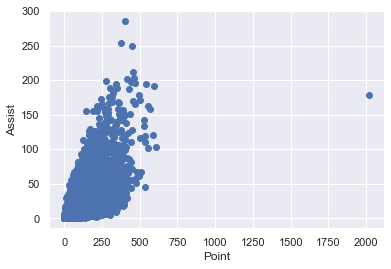

In [106]:
#Scatter Plot
ax = plt.axes()

ax.scatter(data.Point, data.Assist)

# Label the axes
ax.set(xlabel='Point',
       ylabel='Assist',)

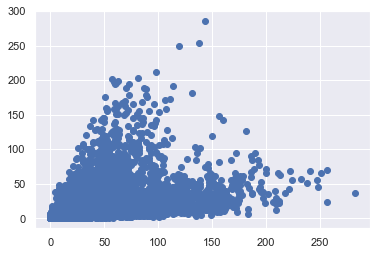

In [107]:
x = data['Rebound']
y = data['Assist']
plt.scatter(x,y)
plt.show()

In [108]:
data.describe()

,Rebound,Assist,Point
count,6873.000000,6873.000000,6873.000000
mean,40.483195,19.710025,103.885930
std,39.181647,26.210593,99.046325
min,0.000000,0.000000,0.000000
25%,10.000000,3.000000,24.000000
50%,29.000000,11.000000,79.000000
75%,58.000000,26.000000,156.000000
max,282.000000,286.000000,2017.000000


In [109]:
data['Point'].sort_values()

508        0
1360       0
5666       0
5667       0
1361       0
        ... 
5602     569
6357     590
6228     595
5757     609
5901    2017
Name: Point, Length: 6873, dtype: int64

In [110]:
data['Assist'].sort_values()

1841      0
5435      0
3886      0
3888      0
5433      0
       ... 
6135    203
6024    212
5960    249
6510    254
6258    286
Name: Assist, Length: 6873, dtype: int64

In [111]:
data['Point'].sort_values()

508        0
1360       0
5666       0
5667       0
1361       0
        ... 
5602     569
6357     590
6228     595
5757     609
5901    2017
Name: Point, Length: 6873, dtype: int64

It can be seen that one data point is considerable to be very high compared to the rest of data.
#### Which if we check:

In [112]:
df = pd.DataFrame(data)
df.iloc[[5901]]

,Season,Name,Team,Rebound,Assist,Point
5901,2017-2018,Alexey Shved,KHI,89,178,2017


It can be seen that the Point the player scored within the season is actually the same as what year the season was in. This may mean an error on data entry where somebody accidentally copied the season year in the point column.

By dropping the outlier,

In [113]:
org_data = data.copy()
data = data.drop([5901])

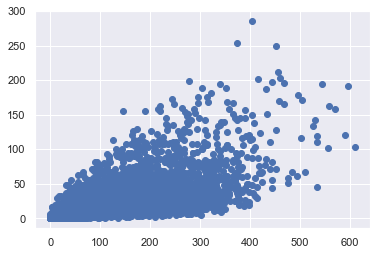

In [114]:
x = data['Point']
y = data['Assist']
plt.scatter(x,y)
plt.show()

We can see now that the scatter plot looks better, even though it is more dense in between around approx. 0 and (450, 200), the graph isn't that distorted by the values above them.
#### Lastly, since in the plot of (Assist, Rebound) we couldn't see any outliers, we can safely say that the data is now cleaned. 

### One-hot encoding for dummy variables

In [115]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

,0,1,2,3,4
Season,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001
Name,Ibrahim Kutluay,Andrew Betts,Vrbica Stefanov,Dimos Dikoudis,Martin Muursepp
Team,ATH,ATH,ATH,ATH,ATH


In [116]:
# Do the one hot encoding
df = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rebound,6872.0,40.476135,39.180126,0.0,10.0,29.0,58.0,282.0
Assist,6872.0,19.686991,26.142840,0.0,3.0,11.0,26.0,286.0
Point,6872.0,103.607538,96.326789,0.0,24.0,79.0,156.0,609.0
Season_2001-2002,6872.0,0.063009,0.242997,0.0,0.0,0.0,0.0,1.0
Season_2002-2003,6872.0,0.049476,0.216876,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
Team_ZAG,6872.0,0.002037,0.045093,0.0,0.0,0.0,0.0,1.0
Team_ZAL,6872.0,0.044383,0.205960,0.0,0.0,0.0,0.0,1.0
Team_ZAS,6872.0,0.003638,0.060210,0.0,0.0,0.0,0.0,1.0
Team_ZEN,6872.0,0.004511,0.067018,0.0,0.0,0.0,0.0,1.0


## Feature Engineering

### Interaction Feature
Being a simple dataset, not many modifications may be needed. However, we can assume that in a fictional world, rebound counts 1, assist counts 2, and goals counts 4 points. With this in mind we can use Polynomial Features to add a new feature of Goals. 

In [127]:
X = data.copy()
X['PtbyAssist'] = X['Assist']*2
X['PtbyRebound'] = X['Rebound']*1
X['Goals'] = round((X['Point'] - X['PtbyAssist'] - X['PtbyRebound'])/4)
X.head()

,Season,Name,Team,Rebound,Assist,Point,PtbyAssist,PtbyRebound,Goals
0,2000-2001,Ibrahim Kutluay,ATH,44,22,282,44,44,48.0
1,2000-2001,Andrew Betts,ATH,122,18,213,36,122,14.0
2,2000-2001,Vrbica Stefanov,ATH,46,41,179,82,46,13.0
3,2000-2001,Dimos Dikoudis,ATH,92,8,147,16,92,10.0
4,2000-2001,Martin Muursepp,ATH,83,12,147,24,83,10.0


### Categories and features derived from category aggregates 

In [137]:
data['Name'].value_counts()

Georgios Printezis     18
Paulius Jankunas       18
Nikos Zisis            17
Juan Carlos Navarro    17
Felipe Reyes           17
Name: Name, dtype: int64

Seeing that some players played in more than one seasons, we could combine all the data regarding to the player and unify them, however that may creates some outliers which we do not want.

In [130]:
pd.get_dummies(data['Name'], drop_first=True).head()

,A.J. Ogilvy,A.J. Slaughter,Aaron Cel,Aaron Craft,Aaron Doornekamp,Aaron Harrison,Aaron Jackson,Aaron Miles,Aaron Mitchell,Aaron White,...,Zaza Pachulia,Zelimir Zagorac,Zoran Dragic,Zoran Erceg,Zoran Nikolic,Zoran Planinic,Zoran Savic,Zoran Viskovic,Zoran Vrkic,Zygimantas Janavicius
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

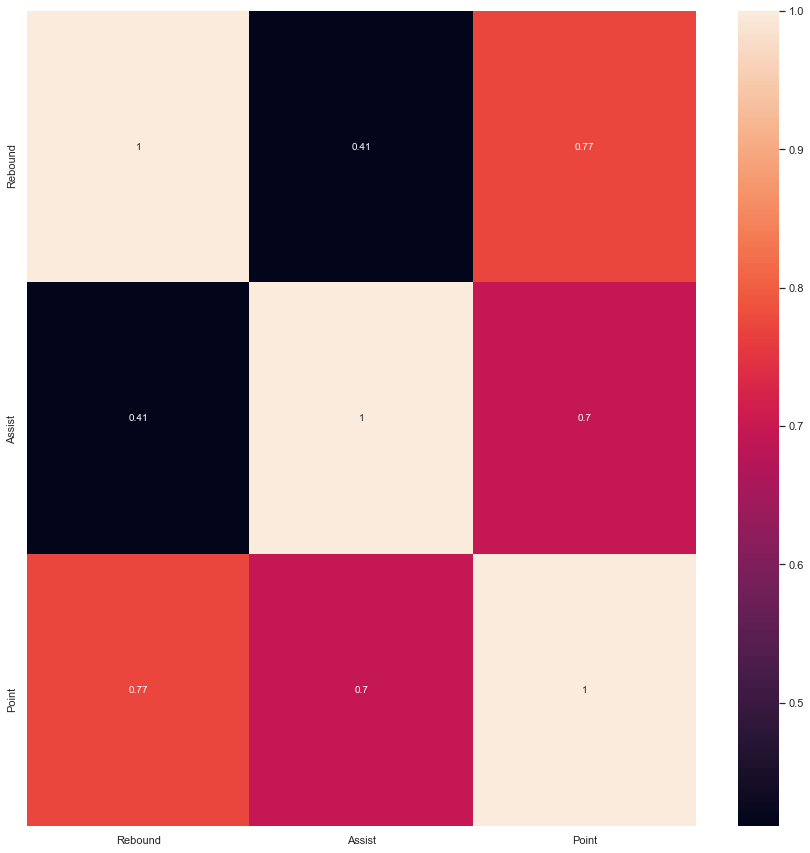

In [131]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), color='b', annot=True)

## Key Findings and Insights

To find key findings and insights, we can try to ask some questions to be framed from the data. Such as,
> 1. What is the percentage of people who play in more than one season?
> 2. What is the percentage of people who play only in one season?
> 3. Which team has the most score of all time (assuming the games started being played in 2000s)
> 4. Which player is the top scorer (within a season) of all time?

For the first question, first we may first count the unique combinations of columns and set it as dataone

In [152]:
from pandas import DataFrame

count = data['Name'].value_counts()
dataone = [tuple((x, y)) for x, y in count.items()]
dataone = DataFrame (dataone, columns = ['Name','TotalSeasons'])
dataone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          2645 non-null   object
 1   TotalSeasons  2645 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 41.5+ KB


Here we just created a new dataframe of the total seasons every player has played.

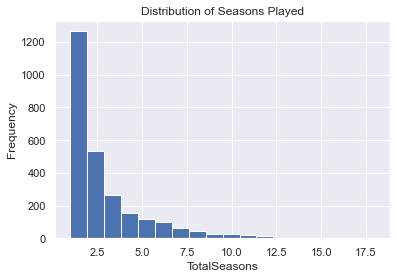

In [156]:
ax = plt.axes()
ax.hist(dataone.TotalSeasons, bins=18);

ax.set(xlabel='TotalSeasons', 
       ylabel='Frequency',
       title='Distribution of Seasons Played');

From the histogram it can be seen that the number of player that played less is so much higher than the ones who played frequently. So even though it is clear enough, in order to see the exact answer, we need to divide the data.

In [164]:
dataonex = dataone.loc[dataone['TotalSeasons'] <= 1,:]
dataoney = dataone.loc[dataone['TotalSeasons'] > 1, :]
dataonex.head()

,Name,TotalSeasons
1379,Josh Akognon,1
1380,Ilya Popov,1
1381,Michael Kuebler,1
1382,Serguei Bazarevitch,1
1383,Mutlu Demir,1


In [163]:
dataoney.head()

,Name,TotalSeasons
0,Georgios Printezis,18
1,Paulius Jankunas,18
2,Nikos Zisis,17
3,Juan Carlos Navarro,17
4,Felipe Reyes,17


In [167]:
percentage1 = (dataonex['TotalSeasons'].sum() / dataone['TotalSeasons'].sum()) * 100
percentage1

18.42258440046566

In [168]:
percentage2 = (dataoney['TotalSeasons'].sum() / dataone['TotalSeasons'].sum()) * 100
percentage2

81.57741559953435

In [181]:
P = {'MoreThanOne': [percentage1], 'One': [percentage2]}
dataP = pd.DataFrame(data=P)
dataP.head()

,MoreThanOne,One
0,18.422584,81.577416


#### Which team has the most score of all time (assuming the games started being played in 2000s)?

We can directly directly count that using pandas count() method, though it is worth noting that other columns but Point should be neglected here.

In [187]:
countT = data.groupby(['Team']).count()
countT[['Point']]

,Point
Team,
ARI,27
ATH,86
AVE,12
BAY,86
BBB,15
...,...
ZAG,14
ZAL,305
ZAS,25


In [193]:
countT[['Point']].sort_values(by='Point', ascending=False)

,Point
Team,
OLY,332
CAJ,311
ZAL,305
FCB,305
CSKA,302
...,...
LUG,12
VER,11
SPL,11


And with sort_values method, we can see that the team with most point of all time is OLY, and with least point is OOS.

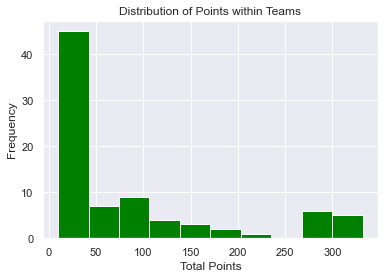

In [179]:
ax = plt.axes()
ax.hist(countT.Point, bins=10, color='green');

ax.set(xlabel='Total Points', 
       ylabel='Frequency',
       title='Distribution of Points within Teams');

### Which player is the top scorer (within a season) of all time?

In [190]:
countP = data.groupby(['Name']).count()
countP[['Point']]

,Point
Name,
A.J. Guyton,2
A.J. Ogilvy,1
A.J. Slaughter,1
Aaron Cel,2
Aaron Craft,1
...,...
Zoran Planinic,10
Zoran Savic,2
Zoran Viskovic,1


In [192]:
countP[['Point']].sort_values(by='Point', ascending=False)

,Point
Name,
Paulius Jankunas,18
Georgios Printezis,18
Felipe Reyes,17
Nikos Zisis,17
Juan Carlos Navarro,17
...,...
Maxim Grigoryev,1
Maxim Barashkov,1
Mauro Sartori,1


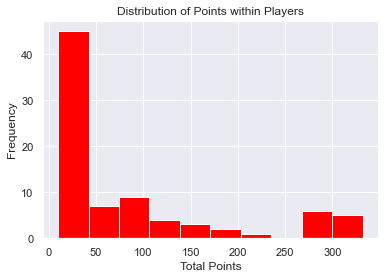

In [194]:
ax = plt.axes()
ax.hist(countT.Point, bins=10, color='red');

ax.set(xlabel='Total Points', 
       ylabel='Frequency',
       title='Distribution of Points within Players');